## HomeWork 1 Due at Mid-night 9/16/2019

## Late Policy: Take off 50% after one day, 80% after two days

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [53]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

**Import all standard libaries**

In [54]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading MPG dataset ##

In [55]:
mpg = pd.read_csv("mpg2.csv")
print(mpg.shape)
mpg.head()

(400, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Question 1. Check if there are any null or NA

In [56]:
mpg.isnull().any()



mpg              True
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

## Question 2. Remove any rows that has null or NA

In [57]:
print(mpg.shape)#I want to check shape and see what happens
mpg.dropna(inplace=True)
print(mpg.shape)

(400, 9)
(393, 9)


## Question 3. Check if there is any outliers in the mpg field

In [58]:
mpg.mpg.describe() #Notice max mpg of 90


count    393.000000
mean      23.615267
std        8.487261
min        9.000000
25%       17.000000
50%       23.000000
75%       29.000000
max       90.000000
Name: mpg, dtype: float64

## Question 4. Display and then Remove the one outlier row. You should now have 392 rows

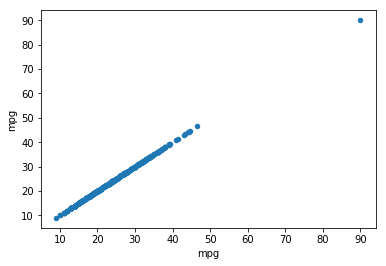

In [59]:
mpg.plot.scatter(x='mpg',y='mpg')
#Not sure what else to plot against since dont have a numeric identifier for each car
#maybe I could of made a unique identifier

In [60]:
mpg = mpg[mpg.mpg < 60]
mpg.shape


(392, 9)

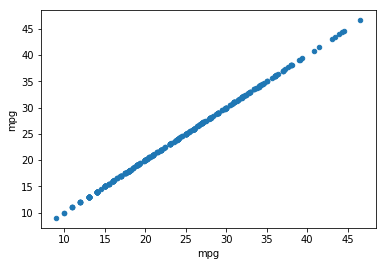

In [61]:
#I want to see how it looks
mpg.plot.scatter(x='mpg',y='mpg')

## Question 5. Calculate the average acceleration cars made in usa using SQL

In [62]:
sql ="select origin,avg(acceleration) from mpg where origin='usa'"
df = ps.sqldf(sql)
df

,origin,avg(acceleration)
0,usa,14.990204


## Question 6. Calculate the average horsepower for each country using SQL

In [63]:
sql = "select origin, avg(horsepower) from mpg group by origin"
df = ps.sqldf(sql)
df

,origin,avg(horsepower)
0,europe,80.558824
1,japan,79.835443
2,usa,119.048980


## Question 7. Calculate the number of occurrences, mean, min, max of the weight for each country using SQL

In [64]:
sql = "select origin, count(*), avg(weight), min(weight), max(weight)from mpg group by origin"
df = ps.sqldf(sql)
df

,origin,count(*),avg(weight),min(weight),max(weight)
0,europe,68,2433.470588,1825,3820
1,japan,79,2221.227848,1613,2930
2,usa,245,3372.489796,1800,5140


## Question 8. Answer Question 7 but use Pandas functions

In [65]:
print("Occurrences for each country")
mpg.groupby(['origin'])['weight'].count()


Occurrences for each country


origin
europe     68
japan      79
usa       245
Name: weight, dtype: int64

In [66]:
print("Mean for each country")
mpg.groupby('origin')['weight'].mean()


Mean for each country


origin
europe    2433.470588
japan     2221.227848
usa       3372.489796
Name: weight, dtype: float64

In [67]:
print("Min for each country")
mpg.groupby('origin')['weight'].min()

Min for each country


origin
europe    1825
japan     1613
usa       1800
Name: weight, dtype: int64

In [68]:
print("Max for each country")
mpg.groupby('origin')['weight'].max()

Max for each country


origin
europe    3820
japan     2930
usa       5140
Name: weight, dtype: int64

## Question 9. Calculate the Standard deviation, Skew and Kurtosis for the horsepower, weight and accleartion for each country

In [69]:
mpg.groupby(['origin'])['weight'].describe()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,68.0,2433.470588,491.813867,1825.0,2071.75,2240.0,2803.75,3820.0
japan,79.0,2221.227848,320.497248,1613.0,1985.00,2155.0,2412.50,2930.0
usa,245.0,3372.489796,795.346690,1800.0,2720.00,3381.0,4055.00,5140.0


In [70]:
mpg.groupby(['origin'])['acceleration'].describe()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,68.0,16.794118,3.087813,12.2,14.5,15.6,19.125,24.8
japan,79.0,16.172152,1.954937,11.4,14.6,16.4,17.550,21.0
usa,245.0,14.990204,2.736020,8.0,13.0,15.0,16.700,22.2


In [71]:
print("Standard Deviation")
#country = mpg.groupby(['origin'])
#country['weight','acceleration'].std()
mpg.groupby(['origin'])['weight','acceleration'].std()

Standard Deviation


,weight,acceleration
origin,,
europe,491.813867,3.087813
japan,320.497248,1.954937
usa,795.346690,2.736020


In [72]:
print('Skew')
#mpg.groupby(['origin']).skew()
#country['weight','acceleration'].skew()
mpg.groupby(['origin'])['weight','acceleration'].skew()

Skew


,weight,acceleration
origin,,
europe,0.812081,0.945656
japan,0.498497,0.042795
usa,0.067009,0.098737


In [73]:
print("Kurtosis")
#country['weight','acceleration'].apply(pd.DataFrame.kurtosis)
mpg.groupby(['origin'])['weight','acceleration'].apply(pd.DataFrame.kurtosis)

Kurtosis


,weight,acceleration
origin,,
europe,-0.249813,0.036290
japan,-0.380625,-0.528450
usa,-0.965494,-0.142774


## Question 10. How would you describe the acceleration distribution for different country based on the Skew?

 The acceleration distribution is basically symmerical for japan and the usa if you round to the nearest integer. But Europe would have a positive skew so it will be a little distorted to the left.
 
 But if we measure with certain decimal point precision, all of the countries acceleration distribution would have a positive skew it would be distorted to the right.

## Question 11. How would you describe the acceleration distribution for different country based on Kurotsis?

Since the Kurtosis is less than 0 in pandas it is consider platykurtic where the peak would be lower and has less outliers this happens in japan and usa. But in Europe is is basically 0 so it would be mesokurtic. 

But if we measure with certain decimal point precision, europe would be leptokurtic kurtosis since its > 0, japan and usa would be platykurtic kurtosis since they are < 0 based on acceleration distribution.

## Question 12. Plot the histogram of acceleration distribution for different country

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19cfa320>,
      dtype=object)

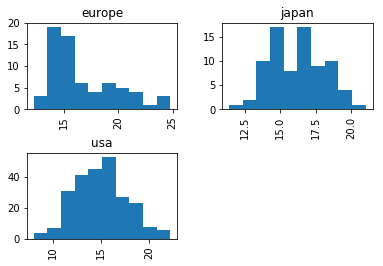

In [74]:
mpg['acceleration'].hist(by=mpg['origin'])

## Question 13. Calculate correlation of all the factors among themselves

In [75]:
mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


## Question 14. Which factors (cylinders, horsepower or weight) will affect your mileage the most based on correlation?

Cylinder,horsepower, and weight all have a similar negative correlation with mileage. So that means they each have an inverse relationship so when one increases up the other decreases. I decided to graph to have a better understanding and it looks like there might not be a linear correlation between mpg and cylinder but you can clearly see that the higher cylinder car you have the less milage you will get.There is a correlation between the mpg and horsepower where the more horsepower you have the less mileage you get which makes sense. ALso the lighter the car in weight the more milage you will get.

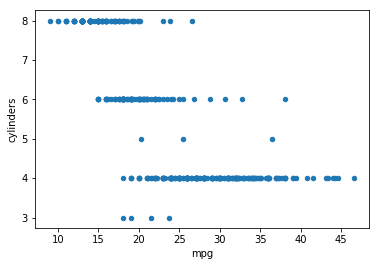

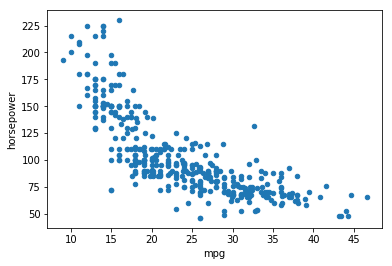

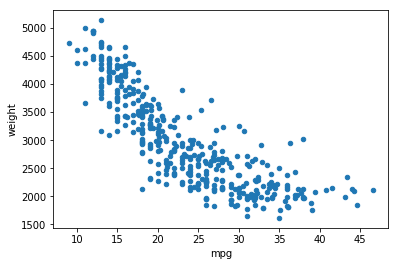

In [76]:
mpg.plot.scatter(x='mpg',y ='cylinders')
mpg.plot.scatter(x='mpg',y ='horsepower')
mpg.plot.scatter(x='mpg',y ='weight')

## Question 15. Does the result depend on the country? If yes, how?

Below I group the same as above by each country and it looks like the result is about the same across each country.So I would say that the result wont not change much depending on the country. I did a lot more analysis on the data below because I wanted to understand more. I notice that the usa had 245 data points and total data points was 392 after taking care of nulls. So there is a huge bias in the data for the usa.

origin
europe    AxesSubplot(0.125,0.125;0.775x0.755)
japan     AxesSubplot(0.125,0.125;0.775x0.755)
usa       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

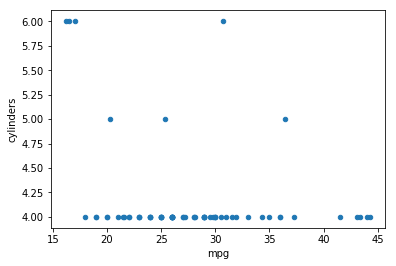

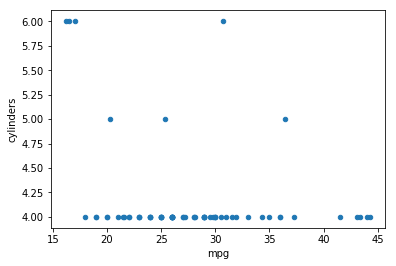

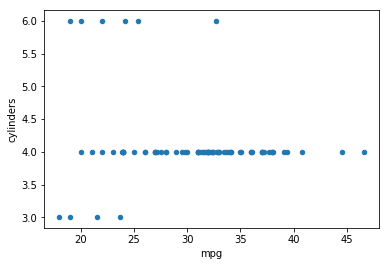

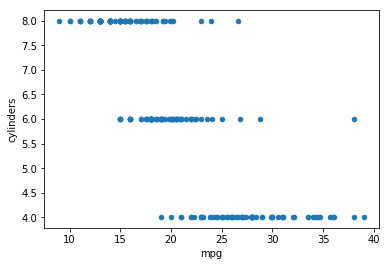

In [77]:
mpg.groupby(['origin']).plot.scatter(x='mpg',y='cylinders')

origin
europe    AxesSubplot(0.125,0.125;0.775x0.755)
japan     AxesSubplot(0.125,0.125;0.775x0.755)
usa       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

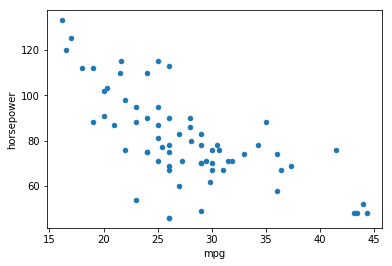

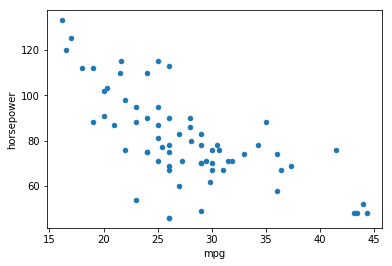

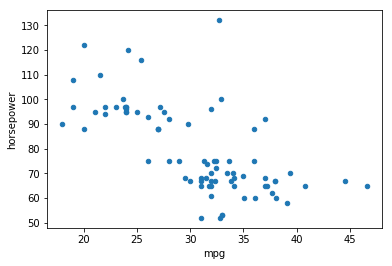

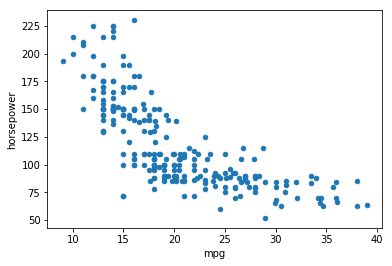

In [78]:
mpg.groupby(['origin']).plot.scatter(x='mpg',y='horsepower')

origin
europe    AxesSubplot(0.125,0.125;0.775x0.755)
japan     AxesSubplot(0.125,0.125;0.775x0.755)
usa       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

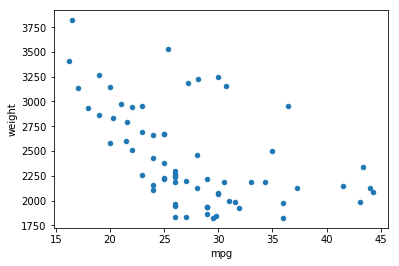

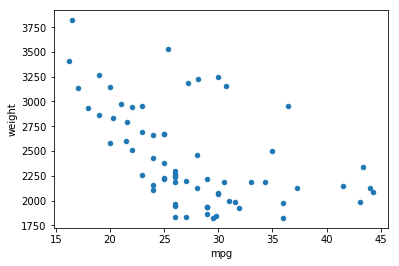

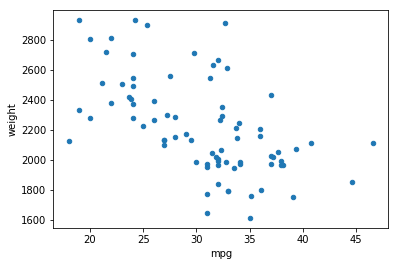

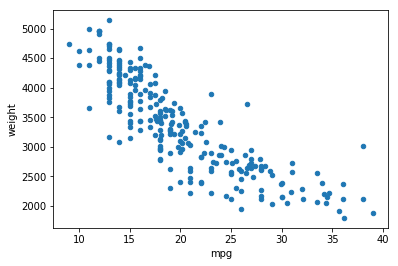

In [79]:
mpg.groupby(['origin']).plot.scatter(x='mpg',y='weight')


In [80]:
mpg.head(3)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


In [81]:
mpg[mpg.origin == 'usa']['origin'].count() #I wanted check datapoints for usa


245

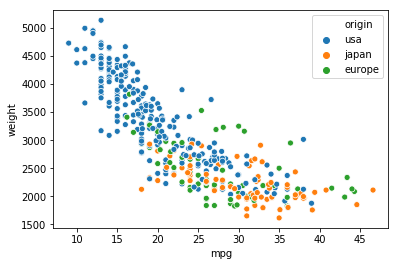

In [82]:
sns.scatterplot(x="mpg", y='weight',hue="origin",data=mpg)


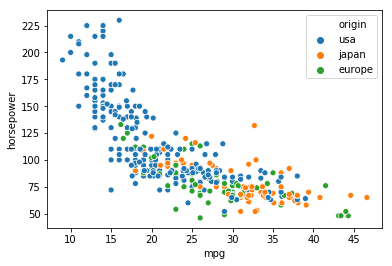

In [83]:
sns.scatterplot(x="mpg", y='horsepower',hue="origin",data=mpg)


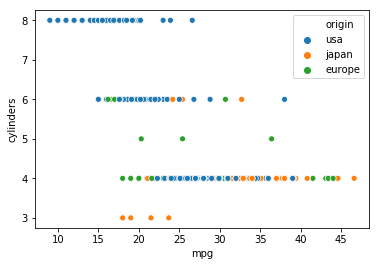

In [84]:
sns.scatterplot(x="mpg", y='cylinders',hue="origin",data=mpg)